## Chapter 4
# Whistler Data

In [27]:
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from sample import Sample
from dataset import Dataset
from database import Database
from sample_detector import SampleDetector

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
dataset = Dataset(dataset_loc, site)
database = Database(dataset_loc, database_loc, site)

## 4.2 Pre-Processing
### 4.2.1 Signal to Noise Ratio

(array([[ 2.5, 54. ],
       [ 2.9, 76. ],
       [ 3. , 77. ]]), array([[390,  54],
       [453,  76],
       [469,  77]]))
(array([[ 12,  64, 358, 466],
       [ 12,  64, 421, 529],
       [ 12,  64, 437, 545]]), 3, 3)


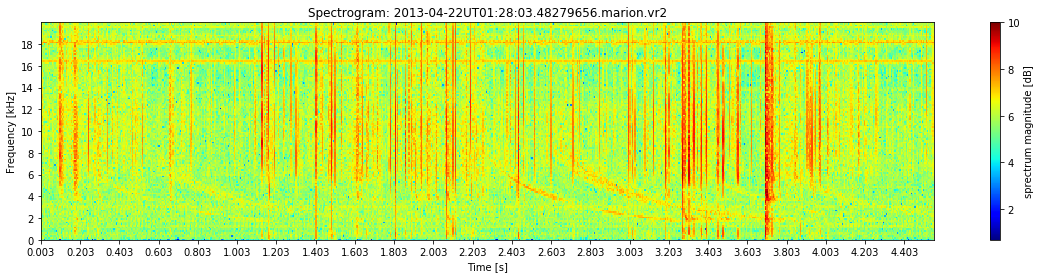

SNR = 5.314 dB


In [28]:
file = np.random.choice(database.get_samples(),1)[0]
# file = '2013-07-19UT01:01:39.12931914.marion.vr2'
# file = '2013-10-08UT02:02:10.20979430.marion.vr2'
file = '2013-04-22UT01:28:03.48279656.marion.vr2'
# file = '2013-07-04UT19:27:45.49091930.marion.vr2'
# print('Train:' if file in database.get_train() else 'Test:', file)
sample = SampleDetector(dataset_loc, site,file)

freq_range, time_err=[2,10],0.1
# print(sample.output())
print(sample.awda_whistlers(time_err=time_err))
print(sample.cuts(cut_freq=freq_range[1]-freq_range[0], cut_freq_min=freq_range[0], time_err=time_err, noise=False))
freq_size = 4
size = (freq_size*sample.get_time_freq_ratio(dec=2), freq_size)
sample.apply_min_max_scale(0,10)
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
print('SNR = %.3f dB'%sample.snr())

### 4.2.2 Preprocessing Visualisation

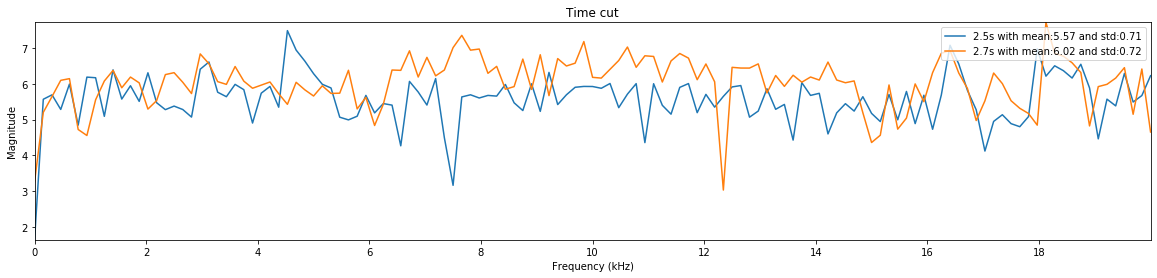

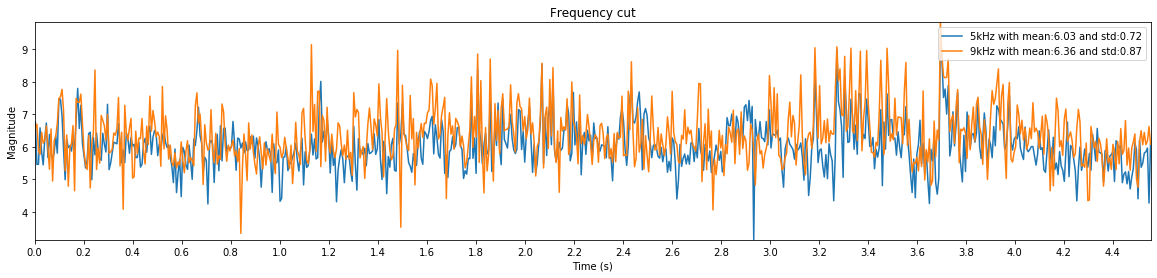

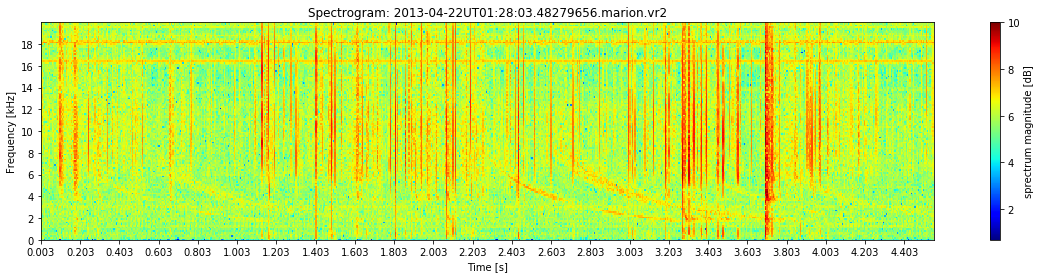

SNR = 5.314 dB


In [29]:
time = [2.5,2.7]
freq = [5,9]
sample.spectrogram_with_axis()
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
print('SNR = %.3f dB'%sample.snr())

### 4.2.3 Z Score Transform

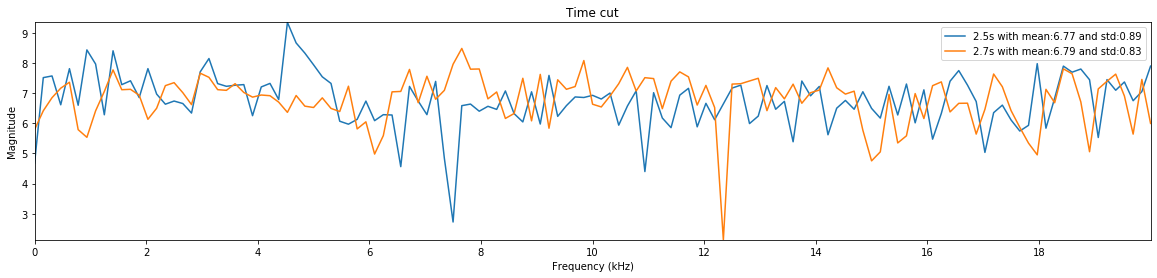

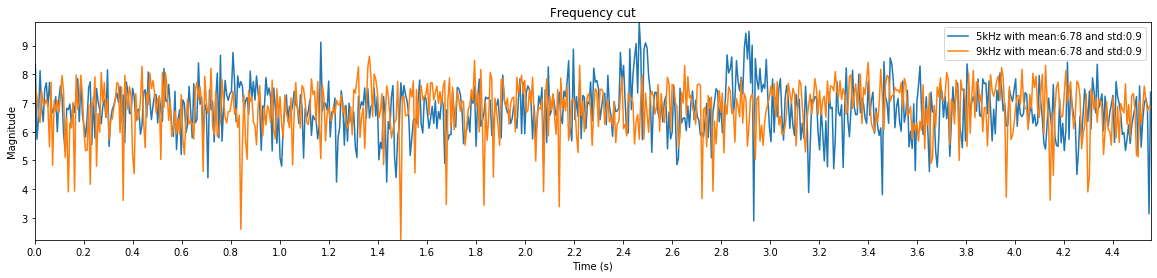

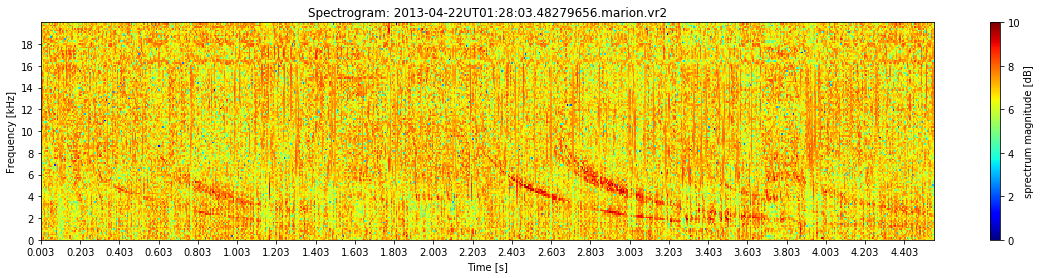

SNR = 8.420dB, Improv = 5.638dB


In [30]:
sample.spectrogram_with_axis()
snr_default = sample.snr()
sample.apply_zscore()
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

### 4.2.4 Detrend
#### Constant

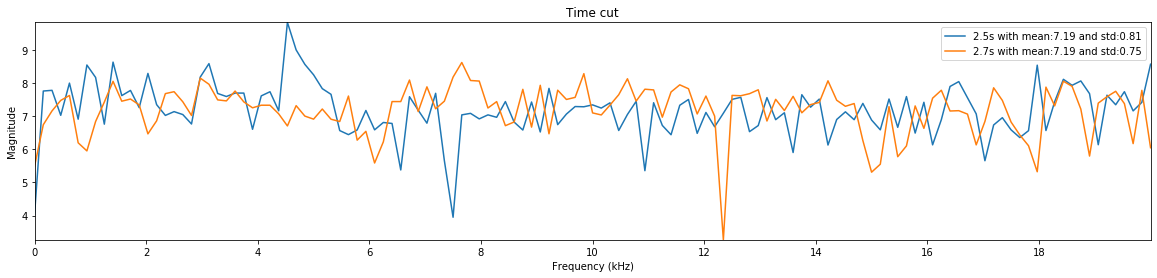

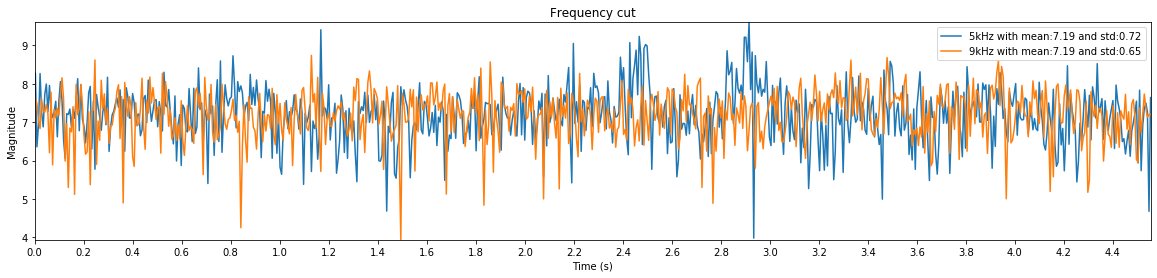

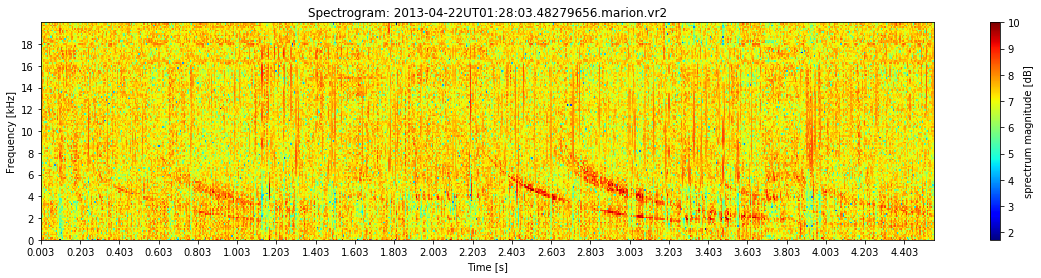

SNR = 7.236dB, Improv = 4.454dB


In [31]:
sample.spectrogram_with_axis()
snr_default = sample.snr()
sample.apply_detrend(type='constant')
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

#### Linear Detrending

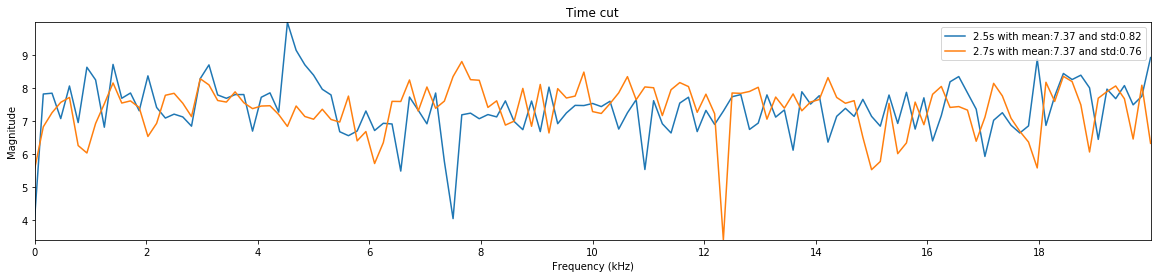

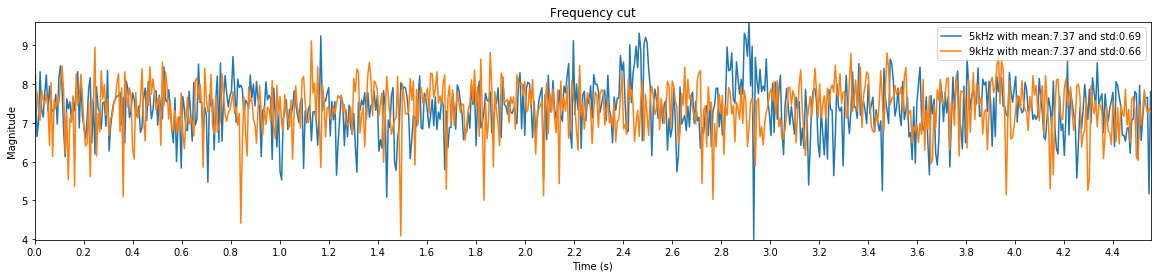

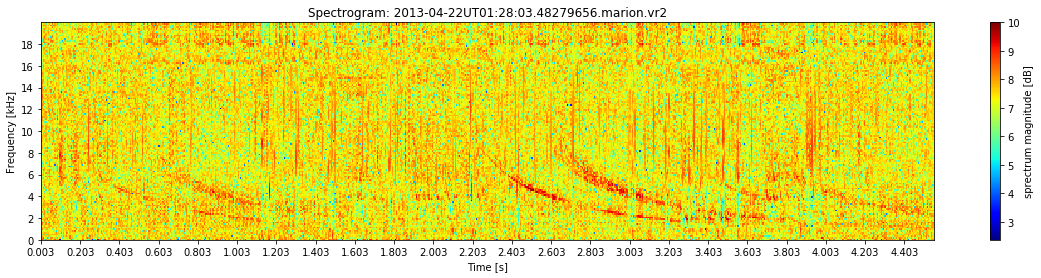

SNR = 5.483dB, Improv = 2.701dB


In [32]:
sample.spectrogram_with_axis()
snr_default = sample.snr()
sample.apply_detrend(type='linear')
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

#### Median Filter

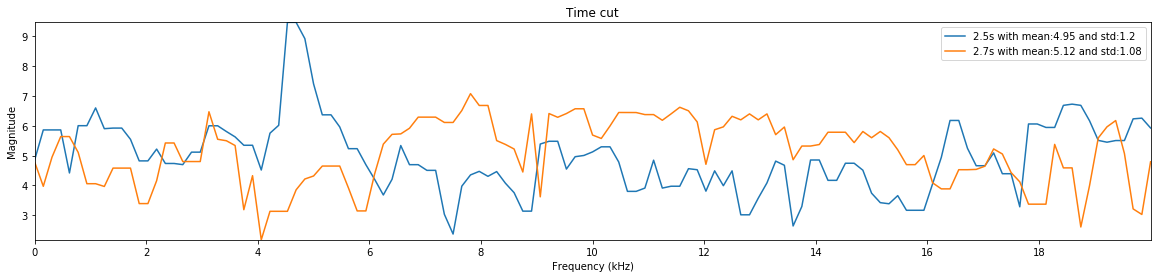

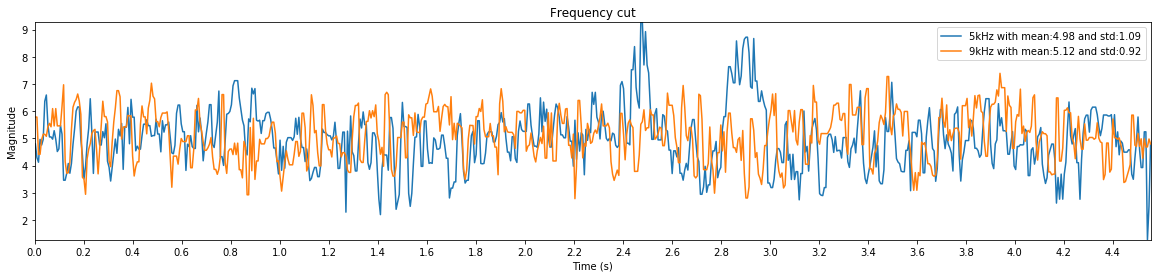

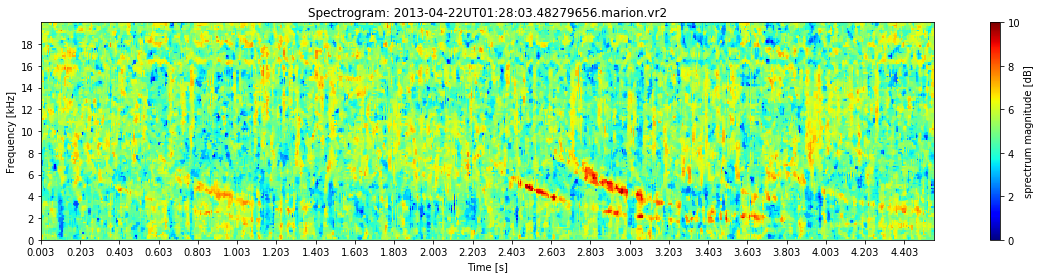

SNR = 30.152dB, 7.515dB, 27.370dB


In [33]:
sample.spectrogram_with_axis()
snr_default = sample.snr()
sample.apply_zscore()
snr_z = sample.snr()
sample.apply_medfilt((3,3))
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
snr = sample.snr()
print('SNR = %.3fdB, %.3fdB, %.3fdB'%(snr,snr_z-snr_default, snr-snr_default))

#### Mean Filter

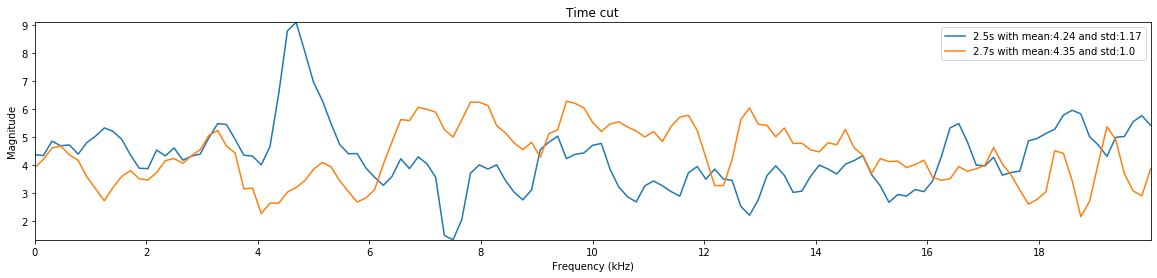

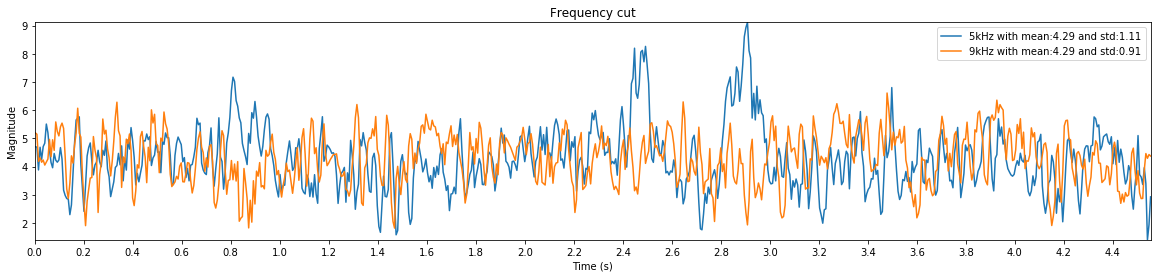

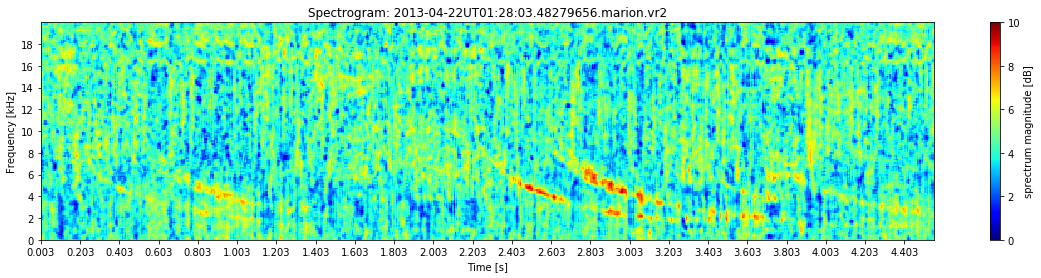

SNR = 34.561dB, 7.515dB, 31.779dB


In [34]:
sample.spectrogram_with_axis()
snr_default = sample.snr()
sample.apply_zscore()
snr_z = sample.snr()
sample.apply_meanfilt((3,3))
sample.apply_min_max_scale(0,10)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
snr = sample.snr()
print('SNR = %.3fdB, %.3fdB, %.3fdB'%(snr,snr_z-snr_default, snr-snr_default))

### 4.2.6 Evaluation 

In [3]:
import multiprocessing as mp
def evaluate_snr(file):
    """[, snr_default, snr_zscore, snr_detrend_cst, snr_detrend_lin, snr_medfilt, snr_meanfilt]"""
    sample = Sample(dataset_loc, site, file)
    sample.spectrogram_with_axis()
    sample.apply_detrend(type='constant')
    snr_detrend_cst = sample.snr()
    sample.spectrogram_with_axis()
    sample.apply_detrend(type='linear')
    snr_detrend_lin = sample.snr()
    sample.spectrogram_with_axis()
    snr_default = sample.snr()
    sample.apply_zscore()
    snr_zscore = sample.snr()
    sample.apply_medfilt((3,3))
    snr_medfilt = sample.snr()
    sample.spectrogram_with_axis()
    sample.apply_zscore()
    sample.apply_meanfilt((3,3))
    snr_meanfilt = sample.snr()
    return np.array([snr_default, snr_zscore, snr_detrend_cst, snr_detrend_lin, snr_medfilt, snr_meanfilt])

files = dataset.get_samples()
results = []
pool = mp.Pool(mp.cpu_count())
# generate 1D array of all spectrogram data
for result in tqdm(pool.imap_unordered(evaluate_snr, files), total=len(files)):
    results.append(result)
pool.close()
pool.join()
results = np.array(results)

100%|██████████| 2196/2196 [04:03<00:00,  9.02it/s]


In [16]:
# results = np.array(results)
methods = ['default','zscore','detrend cst', 'detrend lin', 'medfilt', 'meanfilt']
for i in range(results.shape[1]):
    print("%s:\t mean=%.3f, std=%.3f"%(methods[i],results[:,i].mean(), results[:,i].std()))

default:	 mean=0.357, std=2.896
zscore:	 mean=12.819, std=7.143
detrend cst:	 mean=3.136, std=1.374
detrend lin:	 mean=2.455, std=0.992
medfilt:	 mean=10.357, std=5.846
meanfilt:	 mean=10.761, std=5.907
